In [4]:
import pandas as pd


In [5]:

from io import BytesIO
import requests
spreadsheet_id = '1OdjccfGlv3lsuiWgIAHbE8id91FpVaU2EsaZo5kknaA'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
train = pd.read_csv(BytesIO(r.content))


In [7]:
def get_info(df):

    print("Head:")
    display(df.head())
    print()
    
    print("Info:")
    display(df.info())
    print()
    
    print("Description of quantitative parameters:")
    display(df.describe())
    print()
    
    print("Description of categorical parameters:")
    display(df.describe(include='object'))
    print()
    
    print("Columns with NaN values:")
    display(df.isna().sum())
    print()
    
    print("Shape:")
    display(df.shape)
    print()
    
    print("Number of duplicated rows:")
    display(df.duplicated().sum())  

In [8]:
get_info(train)

Head:


,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


None


Description of quantitative parameters:


,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.650283,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.264471,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000



Description of categorical parameters:


,MMM-YY,Gender,City,Education_Level,Dateofjoining,LastWorkingDate
count,19104,19104,19104,19104,19104,1616
unique,24,2,29,3,869,493
top,2016-01-01,Male,C20,Bachelor,2012-07-23,2017-07-29
freq,1022,11103,1008,6864,192,70



Columns with NaN values:


MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
dtype: int64


Shape:


(19104, 13)


Number of duplicated rows:


0

In [12]:
train['LastWorkingDate'].count()/len(train['Emp_ID'].unique())

0.6787064258714826

In [23]:
train['date'] = pd.to_datetime(train['MMM-YY'], format='%Y-%m-%d')

## Add churn column


In [ ]:
# train.pivot_table(index='Emp_ID', values={'Salary'}, columns='')

In [13]:
def mapper(row):
  if pd.isna(row['LastWorkingDate']):
    return False
  return True


In [17]:
train_churn = train.query('churn == True')

In [29]:
emp_churn = train_churn['Emp_ID'].unique()

In [33]:
def mapper_left(row):
  if row['Emp_ID'] in emp_churn:
    return True
  return False

train['left'] = train.apply(mapper_left, axis=1)
# emp_churn = train_churn['Emp_ID'].unique()

In [34]:
train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,churn,date,left
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,False,2016-01-01,True
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,False,2016-02-01,True
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,True,2016-03-01,True
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,False,2017-11-01,False
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,False,2017-12-01,False


### How many entries are there for each employee?

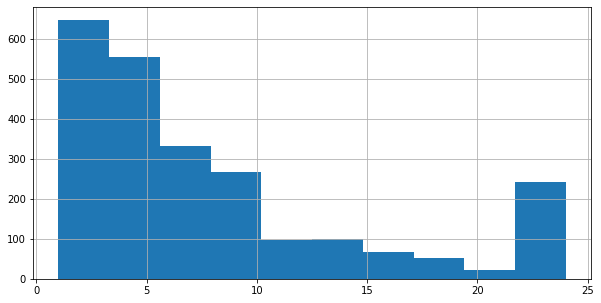

In [28]:
train.groupby('Emp_ID')['churn'].count().hist(figsize=(10,5))

There are around 200 employees with more than 20 entries

## Let's check different features for employees who left and stayed

### Age

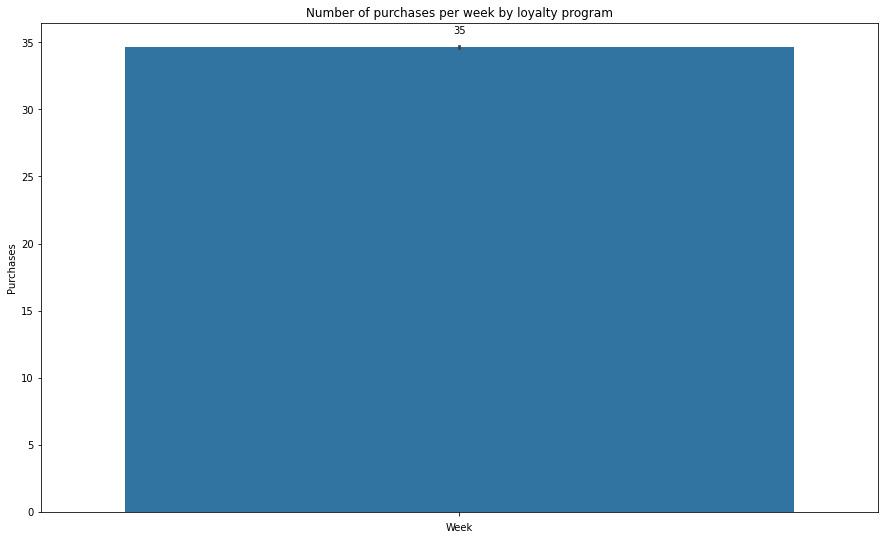

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

size=(15,9)

plt.figure(figsize=size)

fig = sns.barplot(y=train['Age'], hue=train['left'])
plt.title('Number of purchases per week by loyalty program')
plt.xlabel('Week')
plt.ylabel('Purchases')
plt.xticks(rotation=45)

for p in fig.patches:
    height = p.get_height()
    fig.text(x = p.get_x()+(p.get_width()/2), 
 y = height+1, 
 s = '{:.0f}'.format(height), 
 ha ='center') 
    
plt.show()